# Laboratory #08 : Image Classification using CNN

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks
*   Using pre-trained networks

**Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Create reusable functions where ever possible, so that the code could be reused at different places.
*   Mount your drive to access the images.
*   Add sufficient comments and explanations wherever necessary.

---

# **Students** (First Name and Last Name)

1.   Oriol Miró
2.   Marc Gonzalez

---

# **Colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class.
There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


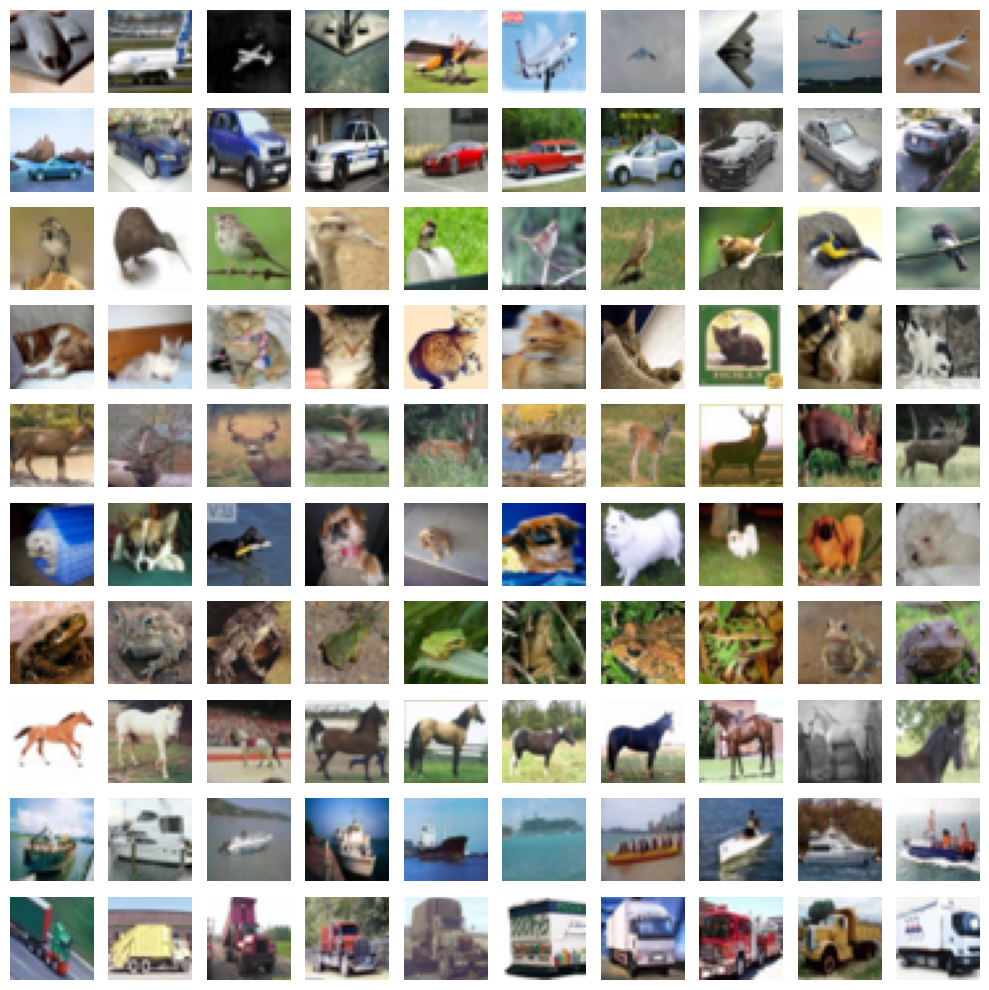

In [5]:
# solution

from tensorflow import keras
from keras import utils
import matplotlib.pyplot as plt
import numpy as np

# ---- load and make sure all is okay ----
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

# ---- visualize ----

# from https://keras.io/api/datasets/cifar10/
class_names = [
    "airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"
]

fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    class_indices = np.where(y_train == i)[0]
    random_indices = np.random.choice(class_indices, size=10, replace=False)
    for j, index in enumerate(random_indices):
        axes[i, j].imshow(x_train[index])
        axes[i, j].axis('off')
    axes[i, 0].set_ylabel(class_names[i], fontsize=12)
plt.tight_layout()
plt.show()

# ---- one hot encoding ----
num_classes = 10
y_train = utils.to_categorical(y_train, num_classes)
y_test  = utils.to_categorical(y_test, num_classes)

# ---- normalize the images ----
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

## Define the following model (same as the one in tutorial)

**For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. Use the input as (32,32,3). The filter maps can then be flattened to provide features to the classifier. Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).**

In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
# solution
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model = Sequential()
model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 20 epochs with a batch size of 512.

In [ ]:
# solution

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
history1 = model.fit(x_train, y_train, batch_size=512, validation_split=0.15, epochs=20)

Epoch 1/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.1922 - loss: 2.2132 - val_accuracy: 0.1569 - val_loss: 3.1426
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2798 - loss: 2.0678 - val_accuracy: 0.1247 - val_loss: 4.9817
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3105 - loss: 2.1256 - val_accuracy: 0.2003 - val_loss: 2.6073
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3465 - loss: 1.8844 - val_accuracy: 0.0984 - val_loss: 4.2844
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3545 - loss: 1.9589 - val_accuracy: 0.1329 - val_loss: 2.9083
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3729 - loss: 1.8321 - val_accuracy: 0.2476 - val_loss: 2.3284
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3983 - loss: 1.7414 - val_accuracy: 0.1915 - val_loss: 3.5937
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4061 - loss: 1.7691 - val_accuracy: 0.1379 - val_l

* What is the role of "validation_split" parameter?

**Solution**

It reserves 15% of the training data for validation during training to monitor performance on unseen data and prevent overfitting. One would stop training once the validation accuracy starts to decay, as that is when we are crossing the overfitting line. **MES QUE PER PREVEURE OVERFITTIING ES PER DETECTARLA, PER PREVINDRE ES REGULARITZAR P.EX**

# Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 20 epochs with a batch size of 512. We will use VGG model as the architecture.

**Stack two convolutional layers with 32 filters, each of 3 x 3. Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. For all the layers, use ReLU activation function. Use same padding for the layers to ensure that the height and width of each layer output matches the input**


In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
# solution

# already defined above but so the code is independent
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

# code
model = Sequential()
model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 814,378 (3.11 MB)

 Trainable params: 814,378 (3.11 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 20 epochs with a batch size of 512.

In [ ]:
# solution

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
history2 = model.fit(x_train, y_train, batch_size=512, validation_split=0.15, epochs=20)

Epoch 1/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.1764 - loss: 2.2336 - val_accuracy: 0.0955 - val_loss: 3.6241
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.2829 - loss: 2.1119 - val_accuracy: 0.1692 - val_loss: 2.6069
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.3316 - loss: 1.9153 - val_accuracy: 0.1560 - val_loss: 2.6873
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.3631 - loss: 1.8467 - val_accuracy: 0.2129 - val_loss: 2.2271
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3860 - loss: 1.7601 - val_accuracy: 0.2005 - val_loss: 2.7284
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.3994 - loss: 1.7444 - val_accuracy: 0.1375 - val_loss: 3.2407
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.4135 - loss: 1.7344 - val_accuracy: 0.1783 - val_loss: 2.7242
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4183 - loss: 1.6893 - val_accuracy: 0.1928 - v

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


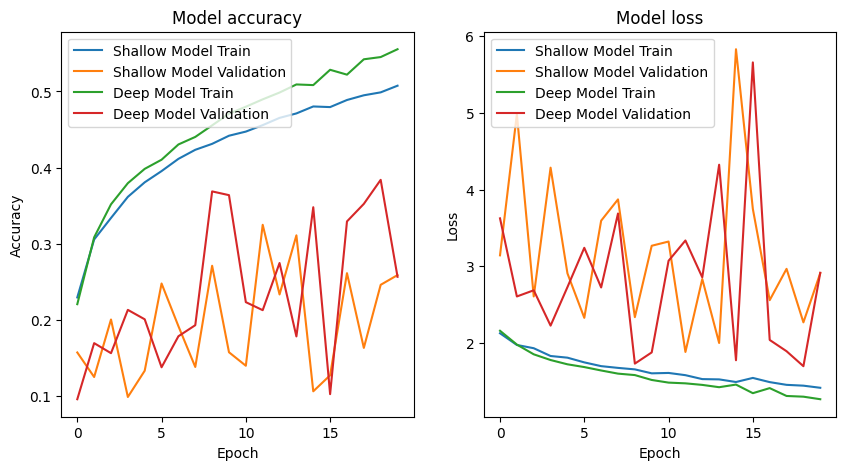

In [ ]:
# solution

# accuracies
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Shallow Model Train', 'Shallow Model Validation','Deep Model Train', 'Deep Model Validation'], loc='upper left')

# losses
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Shallow Model Train', 'Shallow Model Validation','Deep Model Train', 'Deep Model Validation'], loc='upper left')
plt.show()

**Solution**

Both models perform poorly, both in loss and accuracy; there is also little indication that the deeper model performs better, maybe slightly better. Moreover, despite the training curves being relatively smooth, the validation curves are extremely erratic and do not seem to improve: this indicates that both models overfit! We however see an upwards trend in the validation, so perhaps a smaller learning rate coupled with more epochs could ameliorate this issue.

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


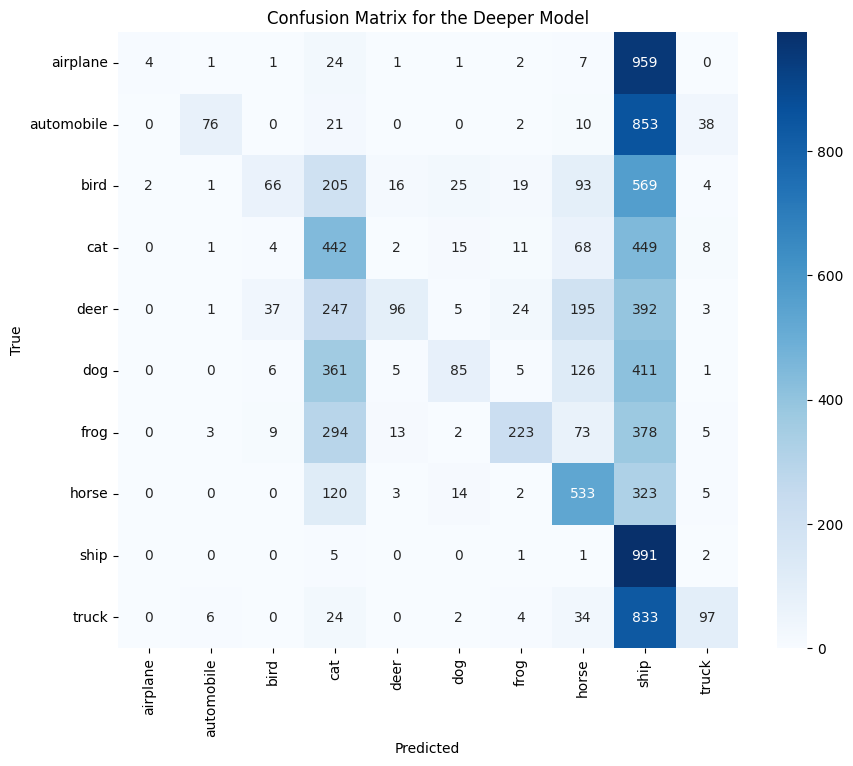

In [ ]:
# solution

from sklearn.metrics import confusion_matrix
import seaborn as sns

# pred for test split
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for the Deeper Model')
plt.show()

**Solution**

It appears that the model almost always predicts the class `ship`,! No wonder the accuracy is so low and the loss is so high; this also explains the erratic validation curves, as we perform well when the validation contains the classes we predict, and awfully in the other cases. Only in very few cases we predict other classes. We are unable to generalise to other classes. Moreover, once again the class we overpredict changes if we train the model again with the same parameters.

*    Print the test accuracy for the trained model.

In [ ]:
# solution

_, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 26.13%


## Define the complete VGG architecture.

**Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, follwed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. Flatten the output of the previous layer using Global average pooling and add a dense layer with 128 units before the classification layer. For all the layers, use ReLU activation function. Use same padding for the layers to ensure that the height and width of each layer output matches the input**

*   Change the size of input to 64 x 64.

In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
# solution

from tensorflow.keras.layers import GlobalAveragePooling2D

# already defined above but so the code is independent
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model = Sequential()
model.add(Input(shape=(64, 64, 3)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))

model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,179,594 (4.50 MB)

 Trainable params: 1,179,594 (4.50 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 20 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [ ]:
# solution

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
history3 = model.fit(x_train, y_train, batch_size=512, validation_split=0.15, epochs=20)

Epoch 1/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 31s 227ms/step - accuracy: 0.1694 - loss: 2.2589 - val_accuracy: 0.1217 - val_loss: 2.8860
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.2282 - loss: 2.1458 - val_accuracy: 0.0953 - val_loss: 3.7828
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.2537 - loss: 2.1560 - val_accuracy: 0.1017 - val_loss: 4.1035
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.2660 - loss: 2.1458 - val_accuracy: 0.1532 - val_loss: 2.8029
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 0.2917 - loss: 1.9746 - val_accuracy: 0.1208 - val_loss: 3.4904
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.3049 - loss: 2.0053 - val_accuracy: 0.1889 - val_loss: 2.2441
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.3337 - loss: 1.8595 - val_accuracy: 0.1581 - val_loss: 3.0302
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.3487 - loss: 1.8583 - val_accuracy: 0.1

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


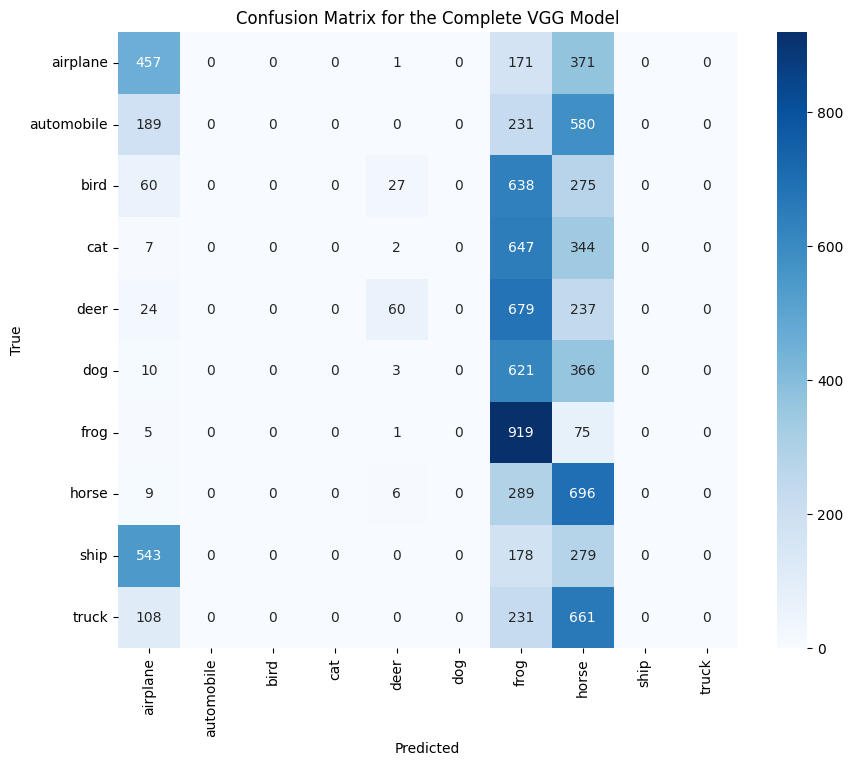

Test Accuracy: 21.32%


In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for the Complete VGG Model')
plt.show()

# accuracy
_, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy*100:.2f}%")

**Solution**

Once again, our model extremely overpredicts a few classes, in this case `frog` and `horse`; only in very few cases we predict other classes, and in some cases we never predict some classes (e.g. `bird`, `cat`, `ship`, and `truck`). We are unable to generalise to other classes. Moreover, once again the class we overpredict changes if we train the model again with the same parameters.

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Solution**


1. Question 1:

  Activation functions add non-linearity to networks, and allow them to learn more complex target functions; moreover, the right choice of activation function aids model convergence. Regarding the need for them: without them, networks would behave as linear models regardless of depth, and would essentially be equivalent to a one-layer model [source](https://medium.com/@luisrg3012/a-deep-neural-network-with-linear-activation-function-is-equivalent-to-a-single-layer-network-969540e36e8d)

2. Question 2:
  
  Sigmoid outputs probabilities for each neuron independently, in the range [0,1], and is often used for binary classification. Softmax normalizes outputs into a probability distribution summing to 1, and is often used in multi-class classification

3. Question 3:

  Binary crossentropy is for binary classification with a single output neuron and sigmoid activation. Categorical crossentropy is for multi-class classification with multiple output neurons and softmax activation.

# Transfer Learning

It is not always necessary to train models from scratch. We can use the knowledge of networks trained on other tasks to learn the task at hand. In this exercise, we will explore the use of pre-trained weights and train on the CIFAR-10 dataset.

*   Create a base imagenet pretrained InceptionV3 model.
    *    Hint: Use tf.keras.applications to create the model
    *    Pay attention to the include_top parameter.


In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
# solution
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(75,75,3))


*    Add a global average pooling layer, followed by a fully-connected layer with 1024 neurons and then the classification layer.

In [ ]:
# solution

# once again, imports for completeness...
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 1, 1, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,911,210 (91.21 MB)

 Trainable params: 23,876,778 (91.08 MB)

 Non-trainable params: 34,432 (134.50 KB)

*   Train the model by freezing the base model. Train only the newly added layers.
    *    Hint: Every layer has an attribute called 'trainable'
*   Compile the model and train the model for 5 epochs only with a batch size of 512.

In [ ]:
# solution

base_model.trainable = False

x_train_resized = tf.image.resize(x_train, (75, 75)) # to avoid an error

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history4 = model.fit(x_train_resized, y_train, batch_size=512, validation_split=0.15, epochs=5)

Epoch 1/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 45s 310ms/step - accuracy: 0.2066 - loss: 2.2100 - val_accuracy: 0.4016 - val_loss: 1.7876
Epoch 2/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 0.4376 - loss: 1.7014 - val_accuracy: 0.4660 - val_loss: 1.5861
Epoch 3/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - accuracy: 0.5051 - loss: 1.5064 - val_accuracy: 0.4937 - val_loss: 1.4797
Epoch 4/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 9s 105ms/step - accuracy: 0.5273 - loss: 1.4081 - val_accuracy: 0.4599 - val_loss: 1.5512
Epoch 5/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 0.5394 - loss: 1.3516 - val_accuracy: 0.5135 - val_loss: 1.4407


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


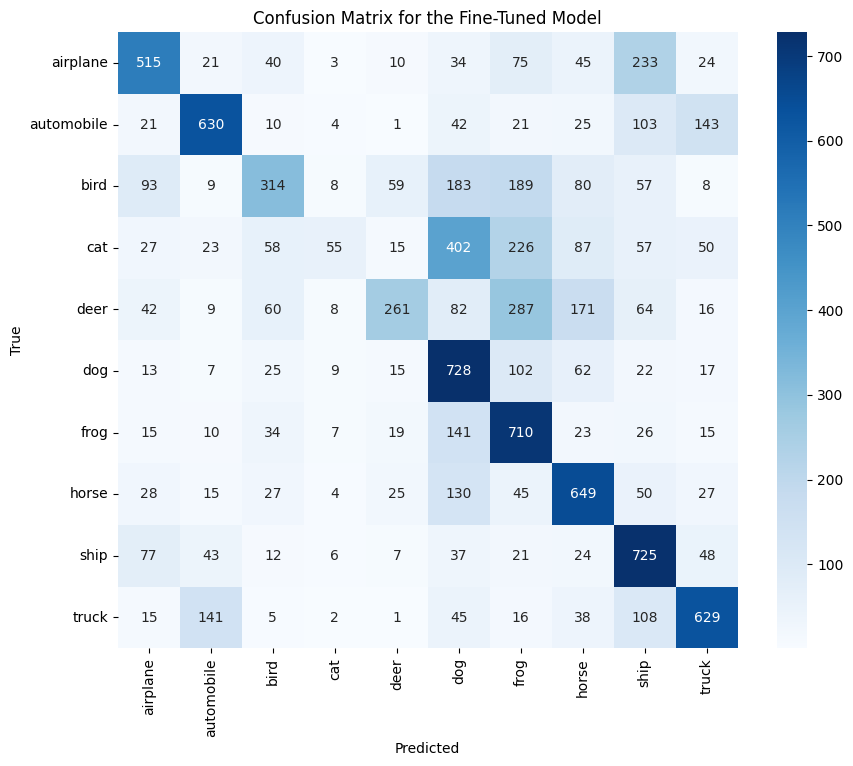

Test Accuracy: 52.16%


In [ ]:
# i wanted to see results

# solution

x_test_resized = tf.image.resize(x_test, (75, 75))

# confusion matrix
y_pred = model.predict(x_test_resized)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for the Fine-Tuned Model')
plt.show()

# accuracy
_, accuracy = model.evaluate(x_test_resized, y_test, verbose=0)
print(f"Test Accuracy: {accuracy*100:.2f}%")


*    Freeze the bottom layers and unfreeze the base layers.
*    Compile and train the classifier with a very low learning rate (0.0001). Retain the batch size
*    Train the model for 20 more epochs
*    Use callbacks to (1) define "Early Stopping" and (2) save only the best model.

In [7]:
# solution

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

x_train_resized = tf.image.resize(x_train, (75, 75)) # to avoid an error

for layer in model.layers:
  layer.trainable = False
for layer in base_model.layers:
    layer.trainable = True

model.compile(
    optimizer=SGD(learning_rate=0.0001, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True)
]

history5 = model.fit(
    x_train_resized, y_train,
    batch_size=512,
    validation_split=0.15,
    epochs=20,
    callbacks=callbacks
)

Epoch 1/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 139s 777ms/step - accuracy: 0.1025 - loss: 2.3373 - val_accuracy: 0.1175 - val_loss: 2.2889
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 30s 350ms/step - accuracy: 0.1262 - loss: 2.2894 - val_accuracy: 0.1312 - val_loss: 2.2834
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 39s 330ms/step - accuracy: 0.1479 - loss: 2.2683 - val_accuracy: 0.1627 - val_loss: 2.2620
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 41s 330ms/step - accuracy: 0.1802 - loss: 2.2350 - val_accuracy: 0.2024 - val_loss: 2.2224
Epoch 5/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 29s 339ms/step - accuracy: 0.2086 - loss: 2.1966 - val_accuracy: 0.2331 - val_loss: 2.1744
Epoch 6/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 28s 327ms/step - accuracy: 0.2448 - loss: 2.1520 - val_accuracy: 0.2637 - val_loss: 2.1273
Epoch 7/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 41s 328ms/step - accuracy: 0.2799 - loss: 2.0873 - val_accuracy: 0.3101 - val_loss: 2.0515
Epoch 8/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 28s 337ms/step - accuracy: 0.3212 - loss: 2.0112 - val_acc

*    Load the best model and predict the output for the test split

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step


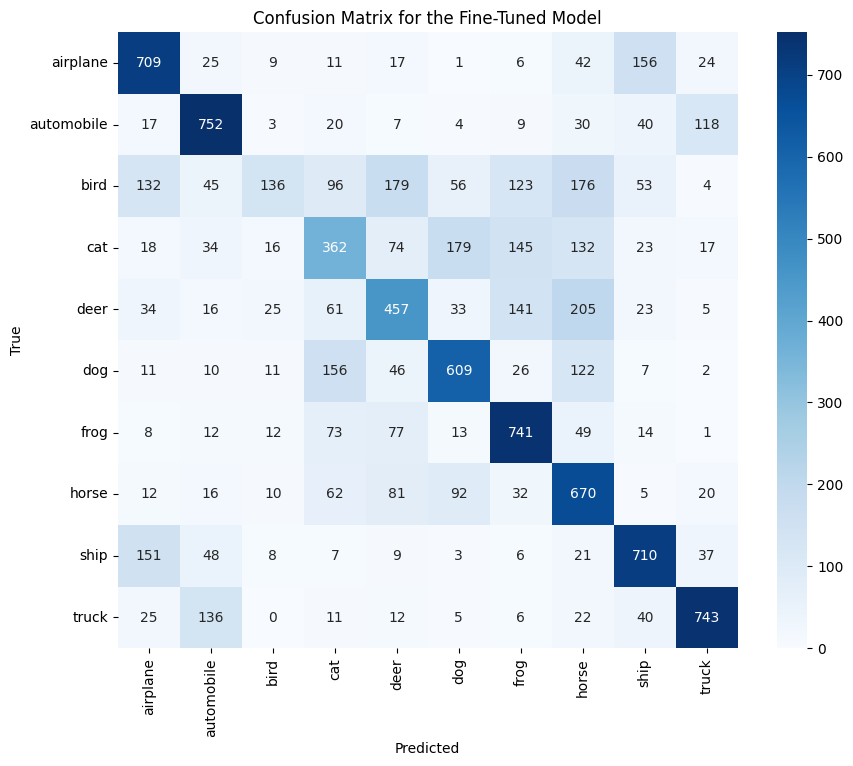

Test Accuracy: 58.89%


In [9]:
# solution

from tensorflow.keras.models import load_model

model = load_model('best_model.keras')

x_test_resized = tf.image.resize(x_test, (75, 75))

# confusion matrix
y_pred = model.predict(x_test_resized)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for the Fine-Tuned Model')
plt.show()

# accuracy
_, accuracy = model.evaluate(x_test_resized, y_test, verbose=0)
print(f"Test Accuracy: {accuracy*100:.2f}%")

*    Compare the performance of the VGG model and the Inception-V3 model.

**Solution**

The comparison differs greatly whether we compare against the Inception-V3 with the base model freezed and training the rest or the opposite. I will first compare the two training regimes we explored for fine-tuning Inception-V3 and then compare the best of these against VGG.

First, when we just fine-tuned the last layers, the model performed pretty well: 52.16% and a reasonable confusion matrix when training for just 5 epochs; on the same line, when freezing the bottom layers and retraining the base model with a low learning rate the performance is also commendable: 58.89% accuracy on the test set. The latter, however, was obtained after training for much longer (5 epochs vs 20 epochs) so it is not possible to know if the difference in performance is due to technique or training time; overall, both ways of fine-tuning Inception-V3 worked very well.

Second, when comparing this last best way of using Inception-V3 against the VGG model, the VGG's performance awful: the model overpredicts a few classes and is unable to generalise, with a very weak test accuracy of 21.32%. Moreover, the validation is much smoother for the fine-tuned Inception-V3 model when compared to the VGG (we have not plot the curves, but say so looking at the outputs during training)-

For all this, the fine-tuned Inception-V3 model is *much better* than VGG (at least with this training setting).

*    When do we train models from scratch? What are the potential issues in training models from scratch?

**Solution**

We train models from scratch when a pre-trained model is unavailable, the task is highly domain-specific with no transferable features from existing models, or when pursuing research into novel architectures or training techniques. Potential issues include the need for large amounts of labeled data, substantial computational resources, and time to achieve good performance. Moreover, training from scratch can lead to overfitting if the dataset is too small, difficulty in converging to an optimal solution, and challenges in achieving state-of-the-art results compared to fine-tuning pre-trained models.

*    Why do we use pre-trained weights?
*    What is the difference between using random initialization and using weights from a pre-trained model?

**Solution**

Question 1:
  To take advantage of knowledge learned from large datasets on similar tasks, reducing training time, the amount of data needed, and the amount of computational resources needed.

Question 2:

  Random initialization starts the model with randomly assigned weights, requiring the model to learn all features from scratch during training, which is computationally expensive and data-intensive. In contrast, pre-trained weights provide a starting point with meaningful features already learned, allowing for the aforementioned advantages.


---

# **End of P8: Image Classification using CNN**

This notebook is part of **Deliverable 4**

Deadline for Deliverable 4 (P8 and P9) submission in CampusVirtual is: **Monday, the 2nd of December, 2024**
